In [4]:
# Your code here
import pandas as pd

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0     84.0            0.0            0.0      0.0   0.0   
1          9.0    112.0           82.0           24.0      0.0  28.2   
2          1.0    139.0           46.0           19.0     83.0  28.7   
3          0.0    161.0           50.0            0.0      0.0  21.9   
4          6.0    134.0           80.0           37.0    370.0  46.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.304  21.0        0  
1                     1.282  50.0        1  
2                     0.654  22.0        0  
3                     0.254  65.0        0  
4                     0.238  46.0        1

In [5]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

X_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0     84.0            0.0            0.0      0.0   0.0   
1          9.0    112.0           82.0           24.0      0.0  28.2   
2          1.0    139.0           46.0           19.0     83.0  28.7   
3          0.0    161.0           50.0            0.0      0.0  21.9   
4          6.0    134.0           80.0           37.0    370.0  46.2   

   DiabetesPedigreeFunction   Age  
0                     0.304  21.0  
1                     1.282  50.0  
2                     0.654  22.0  
3                     0.254  65.0  
4                     0.238  46.0

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 42) #por default el boostrap es true
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import subprocess
import os

# Directorio donde se guardarán las imágenes .png
png_directory = "arboles"
os.makedirs(png_directory, exist_ok=True)
# Convertir archivos .dot a imágenes .png
for tree_number, tree in enumerate(model.estimators_):
    # Visualize the decision tree using Graphviz
    dot_data = export_graphviz(tree, out_file=None,
                               feature_names=X_train.columns,
                               class_names = list(map(str, y_train.unique())),
                               filled=True, rounded=True,
                               special_characters=True)

    # Guardar cada árbol como un archivo .dot
    dot_filename = f"tree_{tree_number}.dot"
    dot_path = os.path.join(png_directory, dot_filename)
    with open(dot_path, 'w') as dot_file:
        dot_file.write(dot_data)

    # Convertir .dot a .png
    png_filename = f"tree_{tree_number}.png"
    png_path = os.path.join(png_directory, png_filename)
    #subprocess.run(["dot", "-Tpng", dot_path, "-o", png_path])
    print(f"Tree {tree_number} saved as {png_filename}")



Tree 0 saved as tree_0.png
Tree 1 saved as tree_1.png
Tree 2 saved as tree_2.png
Tree 3 saved as tree_3.png
Tree 4 saved as tree_4.png
Tree 5 saved as tree_5.png
Tree 6 saved as tree_6.png
Tree 7 saved as tree_7.png
Tree 8 saved as tree_8.png
Tree 9 saved as tree_9.png
Tree 10 saved as tree_10.png
Tree 11 saved as tree_11.png
Tree 12 saved as tree_12.png
Tree 13 saved as tree_13.png
Tree 14 saved as tree_14.png
Tree 15 saved as tree_15.png
Tree 16 saved as tree_16.png
Tree 17 saved as tree_17.png
Tree 18 saved as tree_18.png
Tree 19 saved as tree_19.png
Tree 20 saved as tree_20.png
Tree 21 saved as tree_21.png
Tree 22 saved as tree_22.png
Tree 23 saved as tree_23.png
Tree 24 saved as tree_24.png
Tree 25 saved as tree_25.png
Tree 26 saved as tree_26.png
Tree 27 saved as tree_27.png
Tree 28 saved as tree_28.png
Tree 29 saved as tree_29.png
Tree 30 saved as tree_30.png
Tree 31 saved as tree_31.png
Tree 32 saved as tree_32.png
Tree 33 saved as tree_33.png
Tree 34 saved as tree_34.png
Tree 

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

# Crear solo un gráfico
fig, axis = plt.subplots(figsize=(30, 30))

# Muestra el primer árbol de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax=axis, feature_names=list(X_train.columns), class_names=["0", "1", "2"],
               filled=True, rounded=True, proportion=True, precision=2, fontsize=10)

plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7142857142857143

In [ ]:
from pickle import dump

#dump(model, open("random_forest_classifier_default_42.sav", "wb"))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(n_estimators = 100, bootstrap = False, random_state = 42)
model_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
import os

fig, axis = plt.subplots(2, 2, figsize = (30, 30))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model_1.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_1.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_1.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_1.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [ ]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_1)

0.7532467532467533

In [24]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators = 500, bootstrap = False, random_state = 42)
model_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=500, random_state=42)

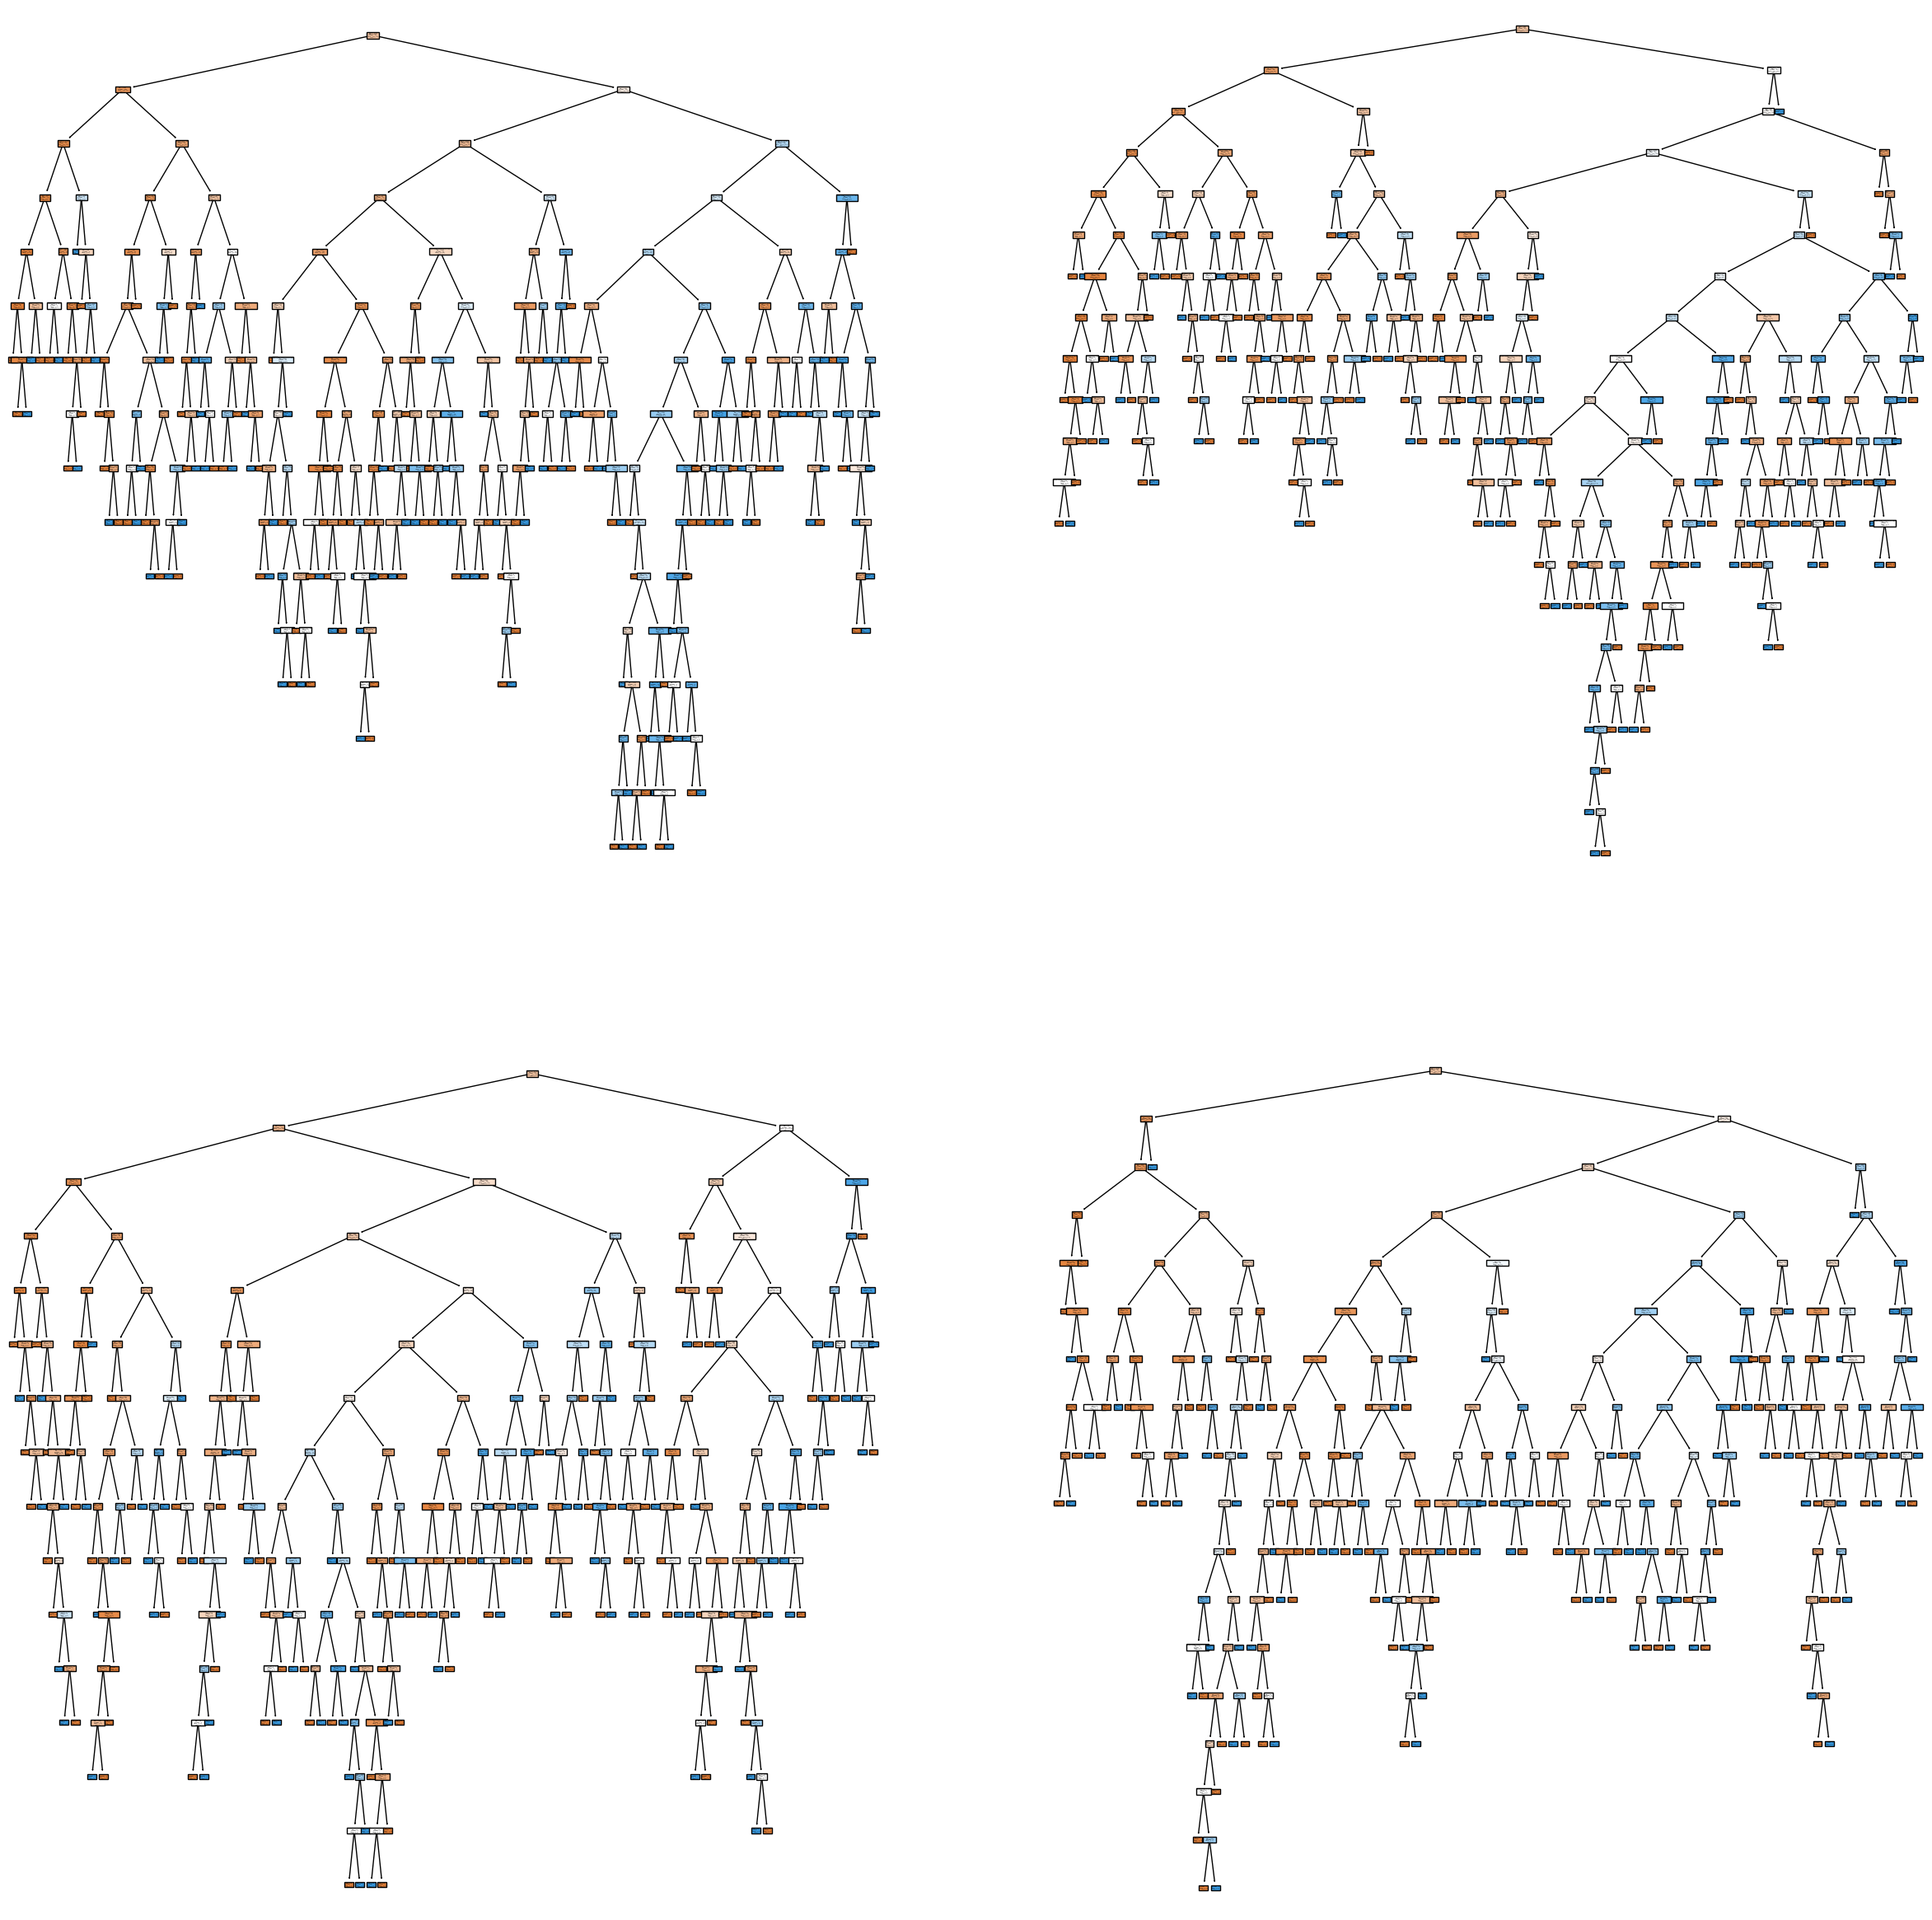

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree
import os

fig, axis = plt.subplots(2, 2, figsize = (30, 30))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model_2.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_2.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_2.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_2.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [26]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_2)

0.7337662337662337

In [28]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(n_estimators = 30, random_state = 42)
model_3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

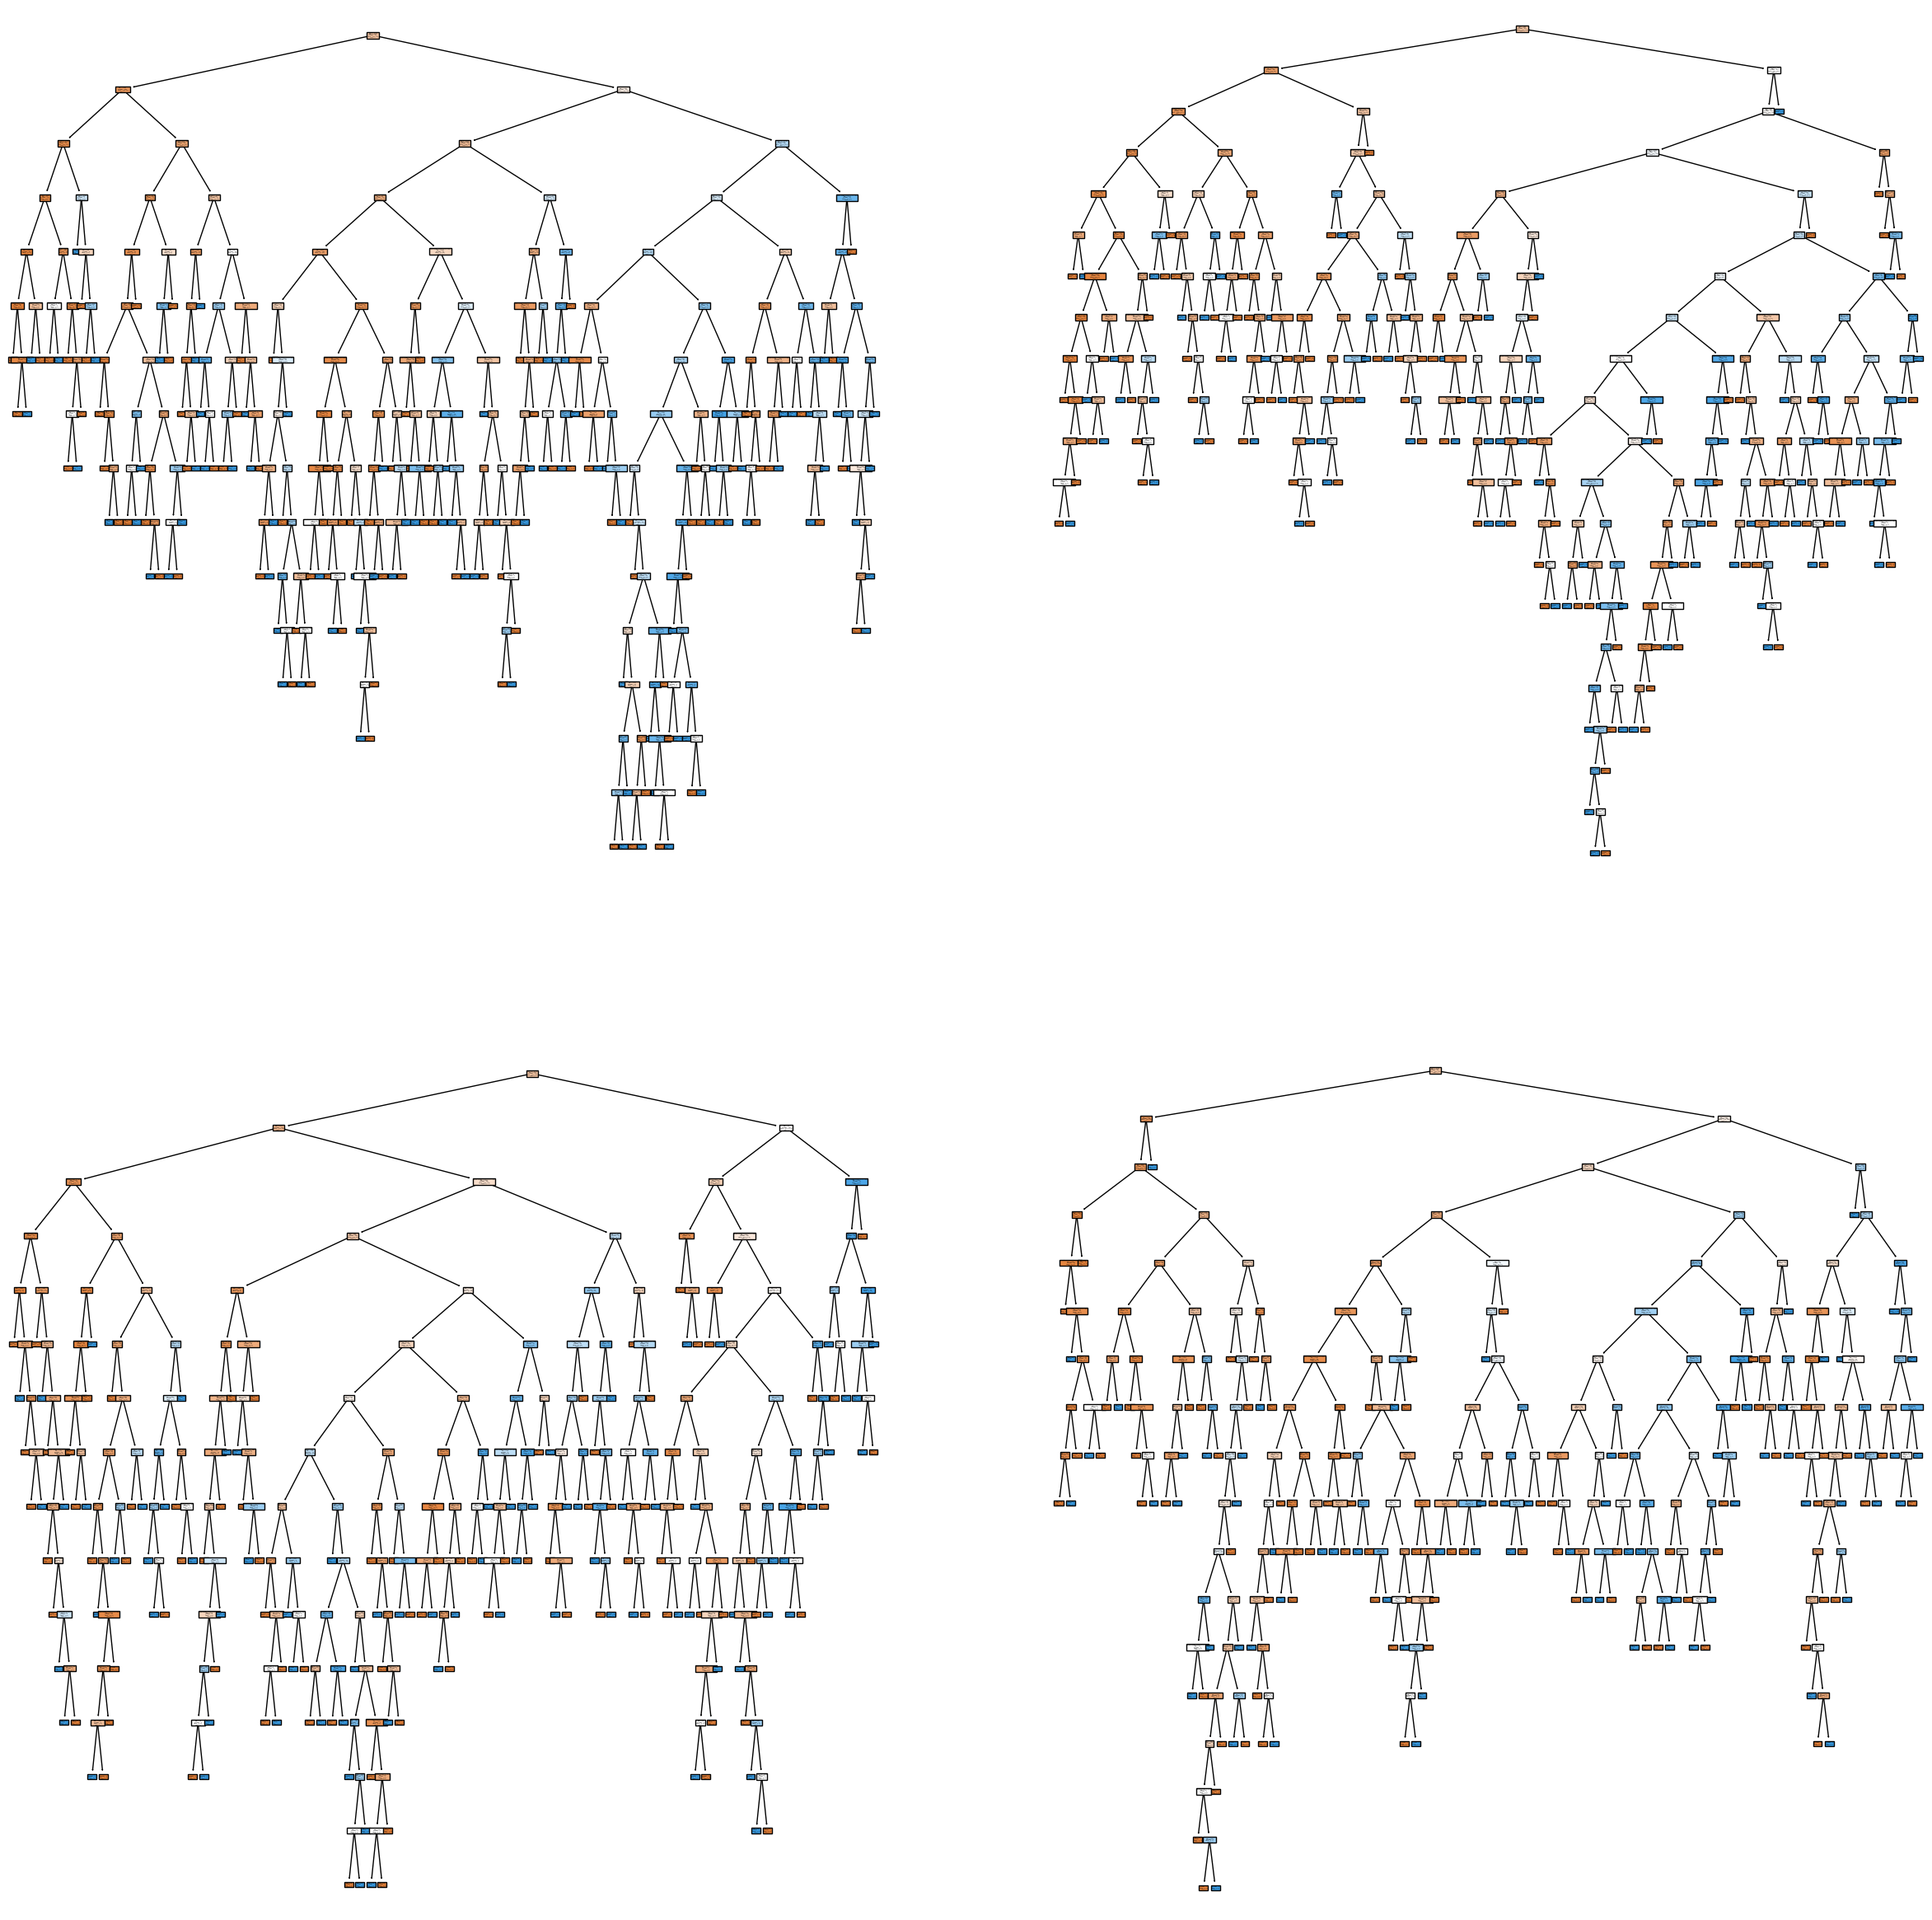

In [29]:
import matplotlib.pyplot as plt
from sklearn import tree
import os

fig, axis = plt.subplots(2, 2, figsize = (30, 30))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model_2.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_2.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_2.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model_2.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [30]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_3)

0.7272727272727273

 Prueba a modificar los dos hiperparámetros que definen al árbol con distintos valores y analiza su impacto con la precisión final y grafica las conclusiones.

Model: n_estimators = 100, accuarancy: 0.7142
Model_1: n_estimators = 100, bootstrap = False, accuarancy: 0.7532
Model_2: n_estimators = 500, accuarancy: 0.7337
Model_3: n_estimators = 30, accuarancy: 0.7272


En este caso particular, el modelo_m1 donde se modifico el parametro de boostrap (false), mejoro el modelo en comparación con los otros donde se modifico el parametro de n_estimador tanto aumentando como disminuyendo el numero de árboles. 